In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_completo = pd.read_csv('events.csv')

/home/ja/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
datos_completo.shape

(1011288, 23)

In [3]:
datos_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
eventos = datos_completo['event']
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

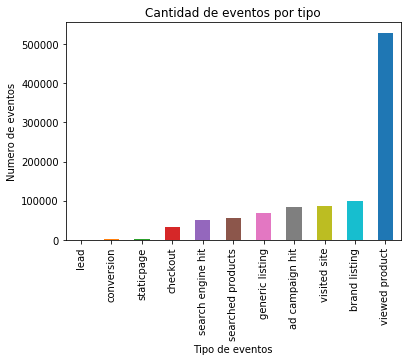

In [5]:
grupo_eventos=datos_completo.groupby(['event'])['event'].count().sort_values()
d=grupo_eventos.plot(kind='bar', title="Cantidad de eventos por tipo")
d.set_ylabel("Numero de eventos")
d.set_xlabel("Tipo de eventos")
d

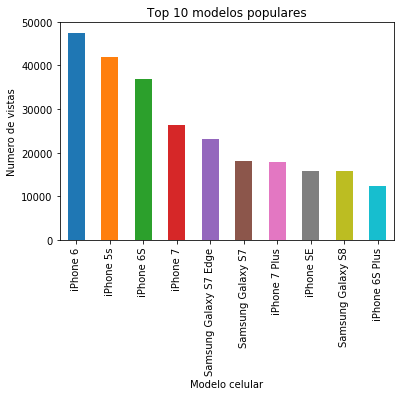

In [8]:
viewed_df=datos_completo[datos_completo['event'].str.contains("viewed product")]
grupo_modelos_populares=viewed_df.groupby(['model'])['model'].count().sort_values(ascending=False)

e=grupo_modelos_populares.head(10).plot(kind='bar', title="Top 10 modelos populares")
e.set_ylabel("Numero de vistas")
e.set_xlabel("Modelo celular")
e

In [5]:
#veamos de donde provienen los usuarios del sitio
df_con_region = datos_completo.loc[pd.notnull(datos_completo['region'])] #saco los que no tienen region
df_personas_con_region = df_con_region.drop_duplicates(subset='person') #saco todos los duplicados de cada usuario
paises_por_cada_usuario = df_personas_con_region['country']
paises_por_cada_usuario.value_counts().head()

Brazil           25768
Unknown            716
United States      297
Argentina           24
Canada              10
Name: country, dtype: int64

In [6]:
#analizamos las ciudades de Brasil donde estan la gran mayoria de los usuarios
df_usuarios_brasil = df_personas_con_region.loc[df_personas_con_region['country'] == 'Brazil']
ciudades_usuarios_brasil = df_usuarios_brasil['city']
cantidad_de_usuarios_brasil_por_ciudad = ciudades_usuarios_brasil.value_counts()[1:11] #Saco a Unknown
cantidad_de_usuarios_brasil_por_ciudad

São Paulo         3532
Rio de Janeiro    1153
Belo Horizonte     748
Salvador           746
Brasília           452
Fortaleza          375
Curitiba           370
Recife             307
Osasco             282
Porto Alegre       281
Name: city, dtype: int64

Text(0,0.5,'Cantidad de usuarios')

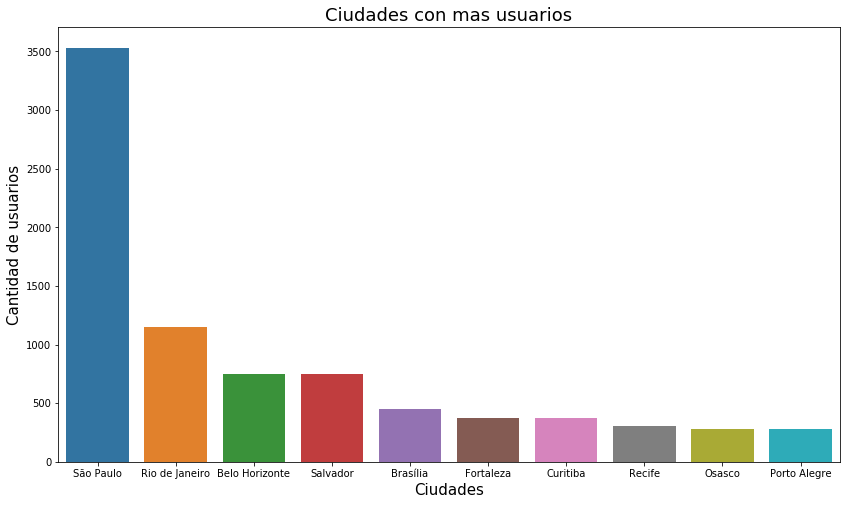

In [7]:
plt.subplots(figsize=(14,8))
bp = sns.barplot(x=cantidad_de_usuarios_brasil_por_ciudad.index, y= cantidad_de_usuarios_brasil_por_ciudad.values)
bp.set_title("Ciudades con mas usuarios", fontsize=18)
bp.set_xlabel("Ciudades", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

Text(0,0.5,'Leads')

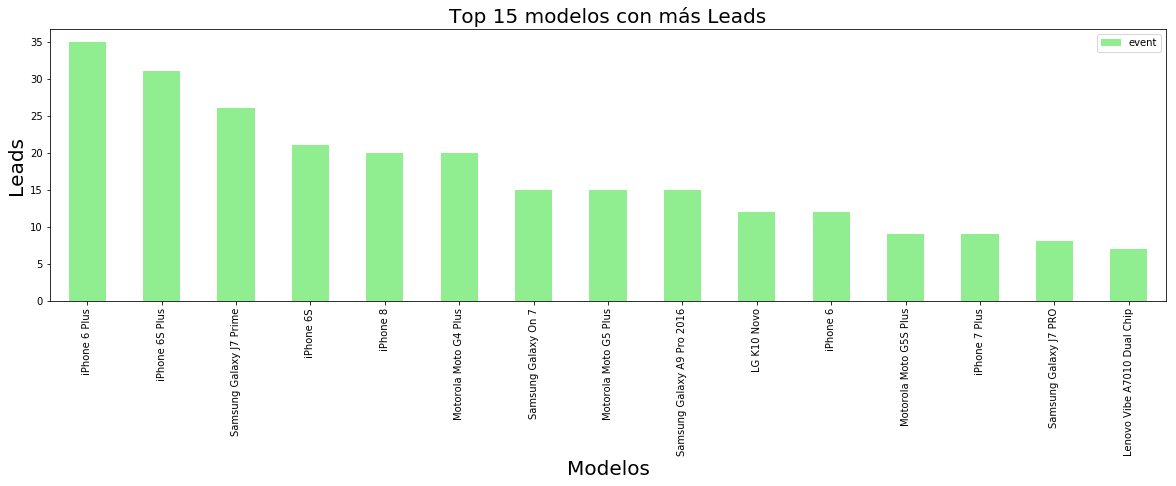

In [8]:
leads_por_model = datos_completo.loc[:, ['event', 'model']].groupby('event').get_group('lead').groupby('model').count().sort_values('event', ascending = False)
leads_por_model.head(15)
#15 modelos con mas leads 
graf1 = leads_por_model.head(15).plot(kind = 'bar', figsize = (20,5), color = 'lightgreen')
graf1.set_title('Top 15 modelos con más Leads', fontsize = 20)
graf1.set_xlabel('Modelos', fontsize = 20)
graf1.set_ylabel('Leads', fontsize = 20)

In [14]:
#personas que realizaron checkouts y conversiones 
events = datos_completo.groupby('event')
viewed = pd.DataFrame(events.get_group('viewed product'))
checkouts =pd.DataFrame(events.get_group('checkout'))
conversiones = pd.DataFrame(events.get_group('conversion'))
#viewed_checkout = pd.merge(checkouts, vieweds, on = 'person', how = 'inner')
#checkout_conversion = pd.merge(conversiones, checkouts, on = 'person', how = 'inner')


In [15]:
# Identifico los ids de los modelos buscados
#PD: ES HORRIBLE, SI A ALGUIEN SE LE OCURRE COMO HACERLO MEJOR SIENTASE LIBRE DE MEJORARLO
searched =pd.DataFrame(events.get_group('searched products'))
searched_skus = searched['skus'].value_counts()
skus_list = []
for skus in searched_skus.index:
    for sku in str(skus).split(','):
        skus_list.append(sku)
id_modelos_buscados = pd.DataFrame(skus_list)
id_modelos_buscados.columns = ['sku']


In [31]:
#quiero comprar los modelos buscados contra los modelos existentes paa ver si hay modelos que son buscados pero 
# no se encuentran disponibles
modelos_existentes = pd.DataFrame(datos_completo.filter(items = ['sku', 'model']))
modelos_existentes.head()
buscados_vs_existentes = pd.merge(id_modelos_buscados, modelos_existentes, on = 'sku', how = 'left')
buscados_vs_existentes.groupby('model').head()

,sku,model
0,8485,Samsung Galaxy S7
1,8485,Samsung Galaxy S7
2,8485,Samsung Galaxy S7
3,8485,Samsung Galaxy S7
4,8471,Samsung Galaxy S7
14,6371,Samsung Galaxy J5
15,6371,Samsung Galaxy J5
16,12758,Samsung Galaxy S8
17,12758,Samsung Galaxy S8
18,12758,Samsung Galaxy S8


In [28]:
# Comparo si hay modelos disponibles que no sean hayan sido buscados
buscados_vs_existentes = pd.merge(id_modelos_buscados, modelos_existentes, on = 'sku', how = 'right')
buscados_vs_existentes.head()

,sku,model
0,8485,Samsung Galaxy S7
1,8485,Samsung Galaxy S7
2,8485,Samsung Galaxy S7
3,8485,Samsung Galaxy S7
4,8485,Samsung Galaxy S7


Text(0,0.5,'Modelo')

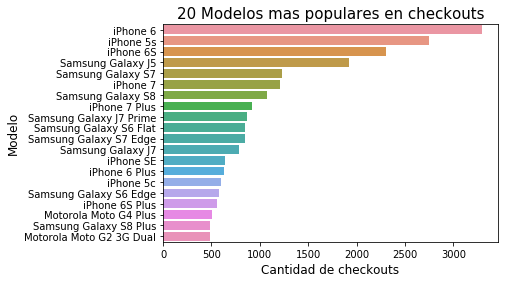

In [18]:
#Modelos mas populares en checkouts
cktModel = checkouts['model'].value_counts().head(20)
g = sns.barplot(x=cktModel.values, y=cktModel.index, orient='h')
g.set_title("20 Modelos mas populares en checkouts", fontsize=15)
g.set_xlabel("Cantidad de checkouts", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)

In [19]:
searched.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Text(0,0.5,'Modelo')

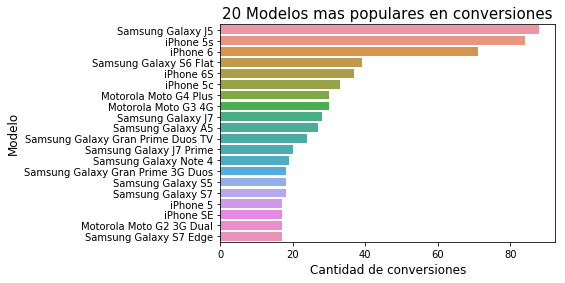

In [20]:
#Modelos mas populares en conversiones
convModel = conversiones['model'].value_counts().head(20)
g = sns.barplot(x=convModel.values, y=convModel.index, orient='h')
g.set_title("20 Modelos mas populares en conversiones", fontsize=15)
g.set_xlabel("Cantidad de conversiones", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)

In [21]:
#cantidad de personas por evento en cada una de las fechas 
cont = datos_completo.groupby(['timestamp', 'event']).count()
contEvents = cont.pivot_table(index = 'timestamp', columns = 'event', values = 'person')
contEvents.groupby('timestamp').head()
persEvent = contEvents.fillna(0)
new1 = persEvent.reset_index()
#Agrego dias y meses
new1['timestamp'] = pd.to_datetime(new1['timestamp'], format='%Y%m%d %H:%M:%S.%f')
new1['mes'] = new1['timestamp'].dt.month
new1.head()

event,timestamp,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,mes
0,2018-01-01 07:32:26,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,2018-01-01 09:51:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2018-01-01 09:51:53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,2018-01-01 12:40:21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,2018-01-01 12:41:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,prom_event,dia,pers_en_event
mes,,,,,,,,,,,,,,
1,1702.0,1953.0,331.0,63.0,1721.0,32.0,1003.0,1341.0,138.0,8851.0,2135.0,19270.0,286278,19270.0
2,2340.0,3101.0,441.0,74.0,2038.0,22.0,1338.0,1507.0,105.0,14130.0,2790.0,27886.0,394055,27886.0
3,6872.0,8489.0,1386.0,265.0,5553.0,69.0,3287.0,4010.0,449.0,39666.0,7247.0,77293.0,1182698,77293.0
4,10888.0,15153.0,1965.0,316.0,9901.0,136.0,5641.0,6761.0,653.0,65944.0,12650.0,130008.0,1832340,130008.0
5,38108.0,44991.0,15645.0,351.0,30472.0,89.0,24259.0,26078.0,1507.0,253312.0,40137.0,474949.0,6723484,474949.0


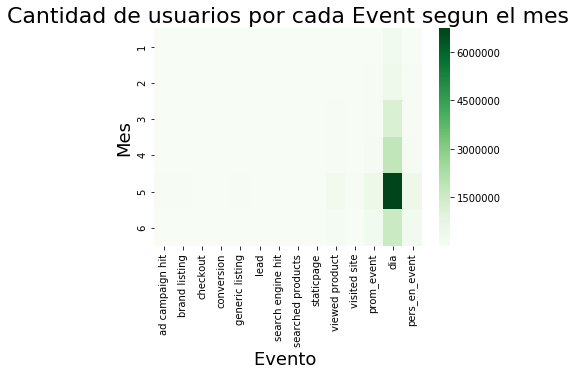

In [27]:
for_heatmap = new1.set_index('mes').groupby('mes').sum()
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title("Cantidad de usuarios por cada Event segun el mes", fontsize=22)
g.set_xlabel("Evento ",fontsize=18)
g.set_ylabel("Mes", fontsize=18)
for_heatmap.head()

In [25]:
# Calculo el promedio de personas que asisten a eventos 
new1['pers_en_event'] = new1.filter(items = ['ad campaign hit', 'brand listing','checkout', 'conversion', 'generic listing','lead', 'search engine hit', 'searched products', 'staticpage', 'viewed product', 'visited site']).sum(axis = 1)
#Agrego los dias 
new1['dia'] = new1['timestamp'].dt.day

mes,1,2,3,4,5,6
dia,,,,,,
1,1.450000,1.194534,1.191138,1.201223,1.199962,1.324900
2,1.182979,1.174455,1.175625,1.194087,1.219022,1.304108
3,1.149367,1.203267,1.177833,1.166667,1.222816,1.303189
4,1.178218,1.201709,1.231760,1.181584,1.214308,1.355860
5,1.114407,1.192547,1.216644,1.175360,1.197156,1.373350


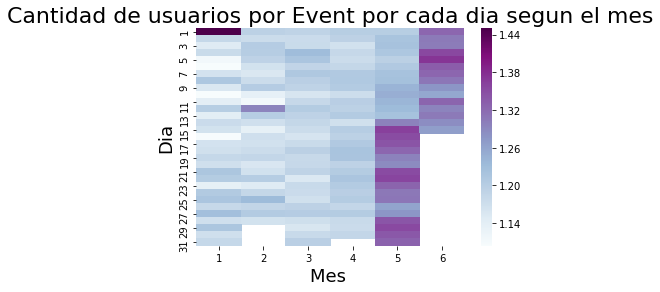

In [26]:
new = new1.pivot_table(index = 'dia', columns = 'mes', values = 'pers_en_event')
g = sns.heatmap(new,  cmap="BuPu", )
g.set_title("Cantidad de usuarios por Event por cada dia segun el mes", fontsize=22)
g.set_xlabel("Mes ",fontsize=18)
g.set_ylabel("Dia", fontsize=18)
new.head()